In [1]:
from unetseg.train import TrainConfig, train
from unetseg.evaluate import plot_data_generator
import os

2023-03-11 23:23:19.948895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 23:23:20.119452: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-11 23:23:20.123399: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guillermo/anaconda3/envs/unet/lib/python3.10/site-packages/cv2/../../lib64:
2

In [2]:
config = TrainConfig(
    width=160,  #  tamaño de la imagen procesada por la UNet (debe ser multiplos de 16 , por ej 160, 320,etc)
    height=160,
    n_channels=3,  #  número de canales de la imagen, rgb -> 3
    n_classes=1, # número de clases a clasificar
    apply_image_augmentation=True, #  si es True , amplia el dataset generando imagenes nuevas a partir de pequeñas variaciones de las ya existentes 
    seed=42,
    epochs=20, # Cantidad de veces que el dataset entero puede pasar por el proceso de entrenamiento
    batch_size=16, #cantidad de datos que se procesan por vez, puede ser limitado por la memoria de gpu disponible (debe ser multiplo de 16)
    steps_per_epoch=25, #  típicamente debe ser igual al numero de imágenes / el batch_size, si es mayor incrementara el número de imágenes generadas con image augmentation
    early_stopping_patience=5, # a medida que entrena se guarda los resultados del entrenamiento despues de cada epoch, si el error no varió luego de 3 iteraciones , se corta el proceso porque se entiende que el error ya disminuyó significativamente 
    validation_split=0.2, # se divide la muestra en training y validation para calcular el error durante el proceso de entrenamiento
    test_split=0.1,
    images_path=os.path.join('./data_train','3D', '600_600'), #ruta a las imágenes
    masks_path=os.path.join('./data_train','3D', '600_600', 'extent'), #ruta a las mascaras
    model_path=os.path.join('./modelo/weights/', 'UNet_piscinas_3D_600_600_spe150.h5'),#  ruta al archivo de entrenamiento
    model_architecture='unet',
    evaluate=True,
    class_weights= [1]
    ) 

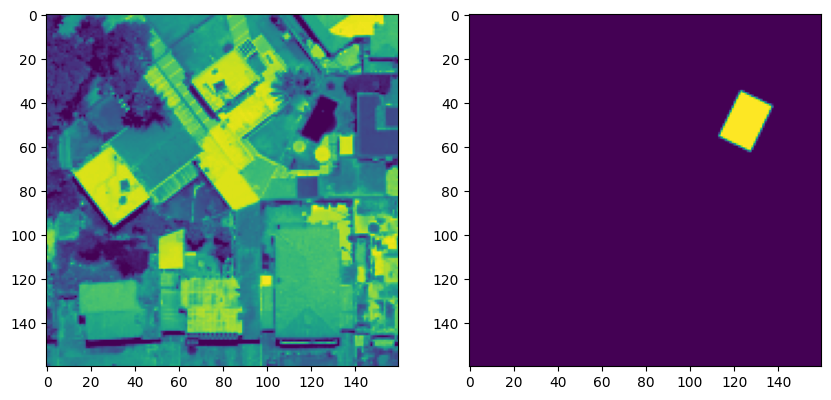

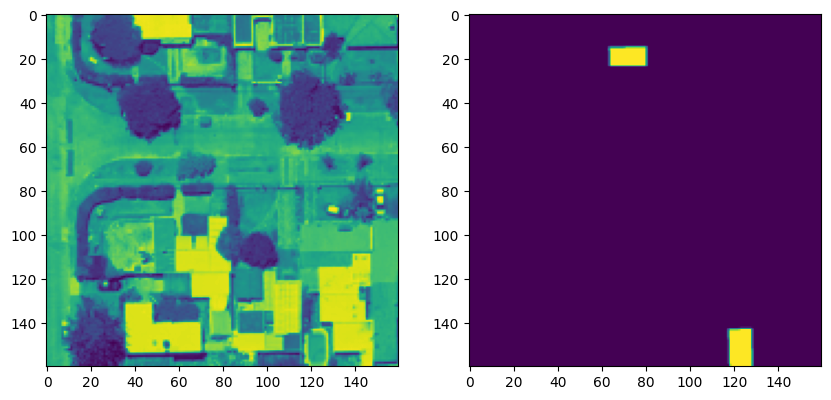

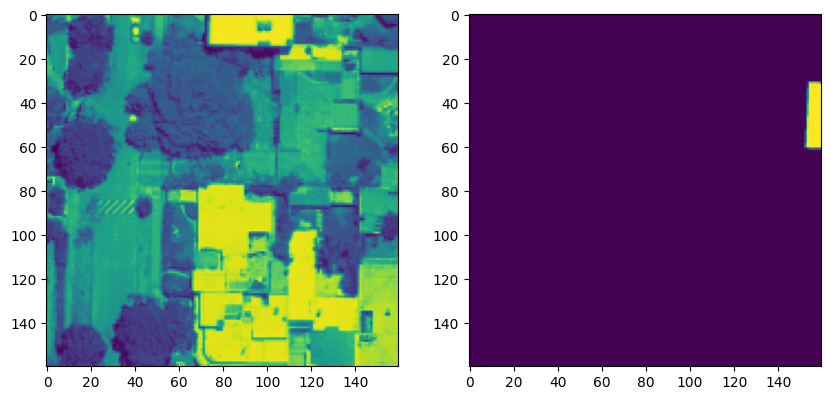

In [3]:
plot_data_generator(num_samples=3, fig_size=(10, 10), train_config=config,img_ch = 3)

In [6]:
res_config = train(config)

2023-03-11 14:56:59.513043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guillermo/anaconda3/envs/unet/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-11 14:56:59.513062: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-11 14:56:59.513077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (msi): /proc/driver/nvidia/version does not exist
2023-03-11 14:56:59.514108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 160, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

KeyError: 'mean_iou'

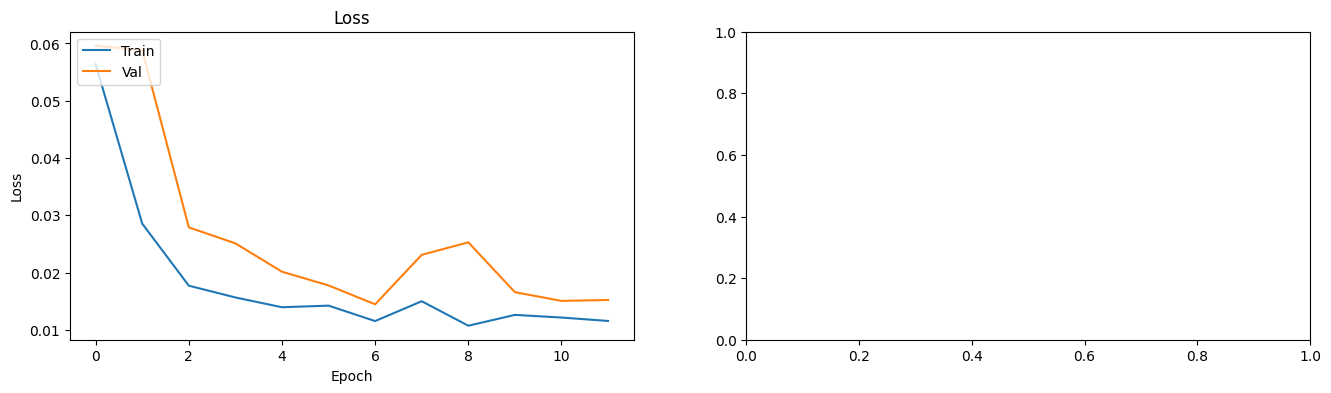

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(res_config.history['loss'])
plt.plot(res_config.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(res_config.history['mean_iou'])
plt.plot(res_config.history['val_mean_iou'])
plt.title('mean_iou')
plt.ylabel('val_mean_iou')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


plt.show()